In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, RocCurveDisplay
import pickle
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv("./Dataset/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Handling Missing Value

In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df['ph'].fillna(df['ph'].median(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].median(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(), inplace=True)

In [7]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Exploratory Data Analysis

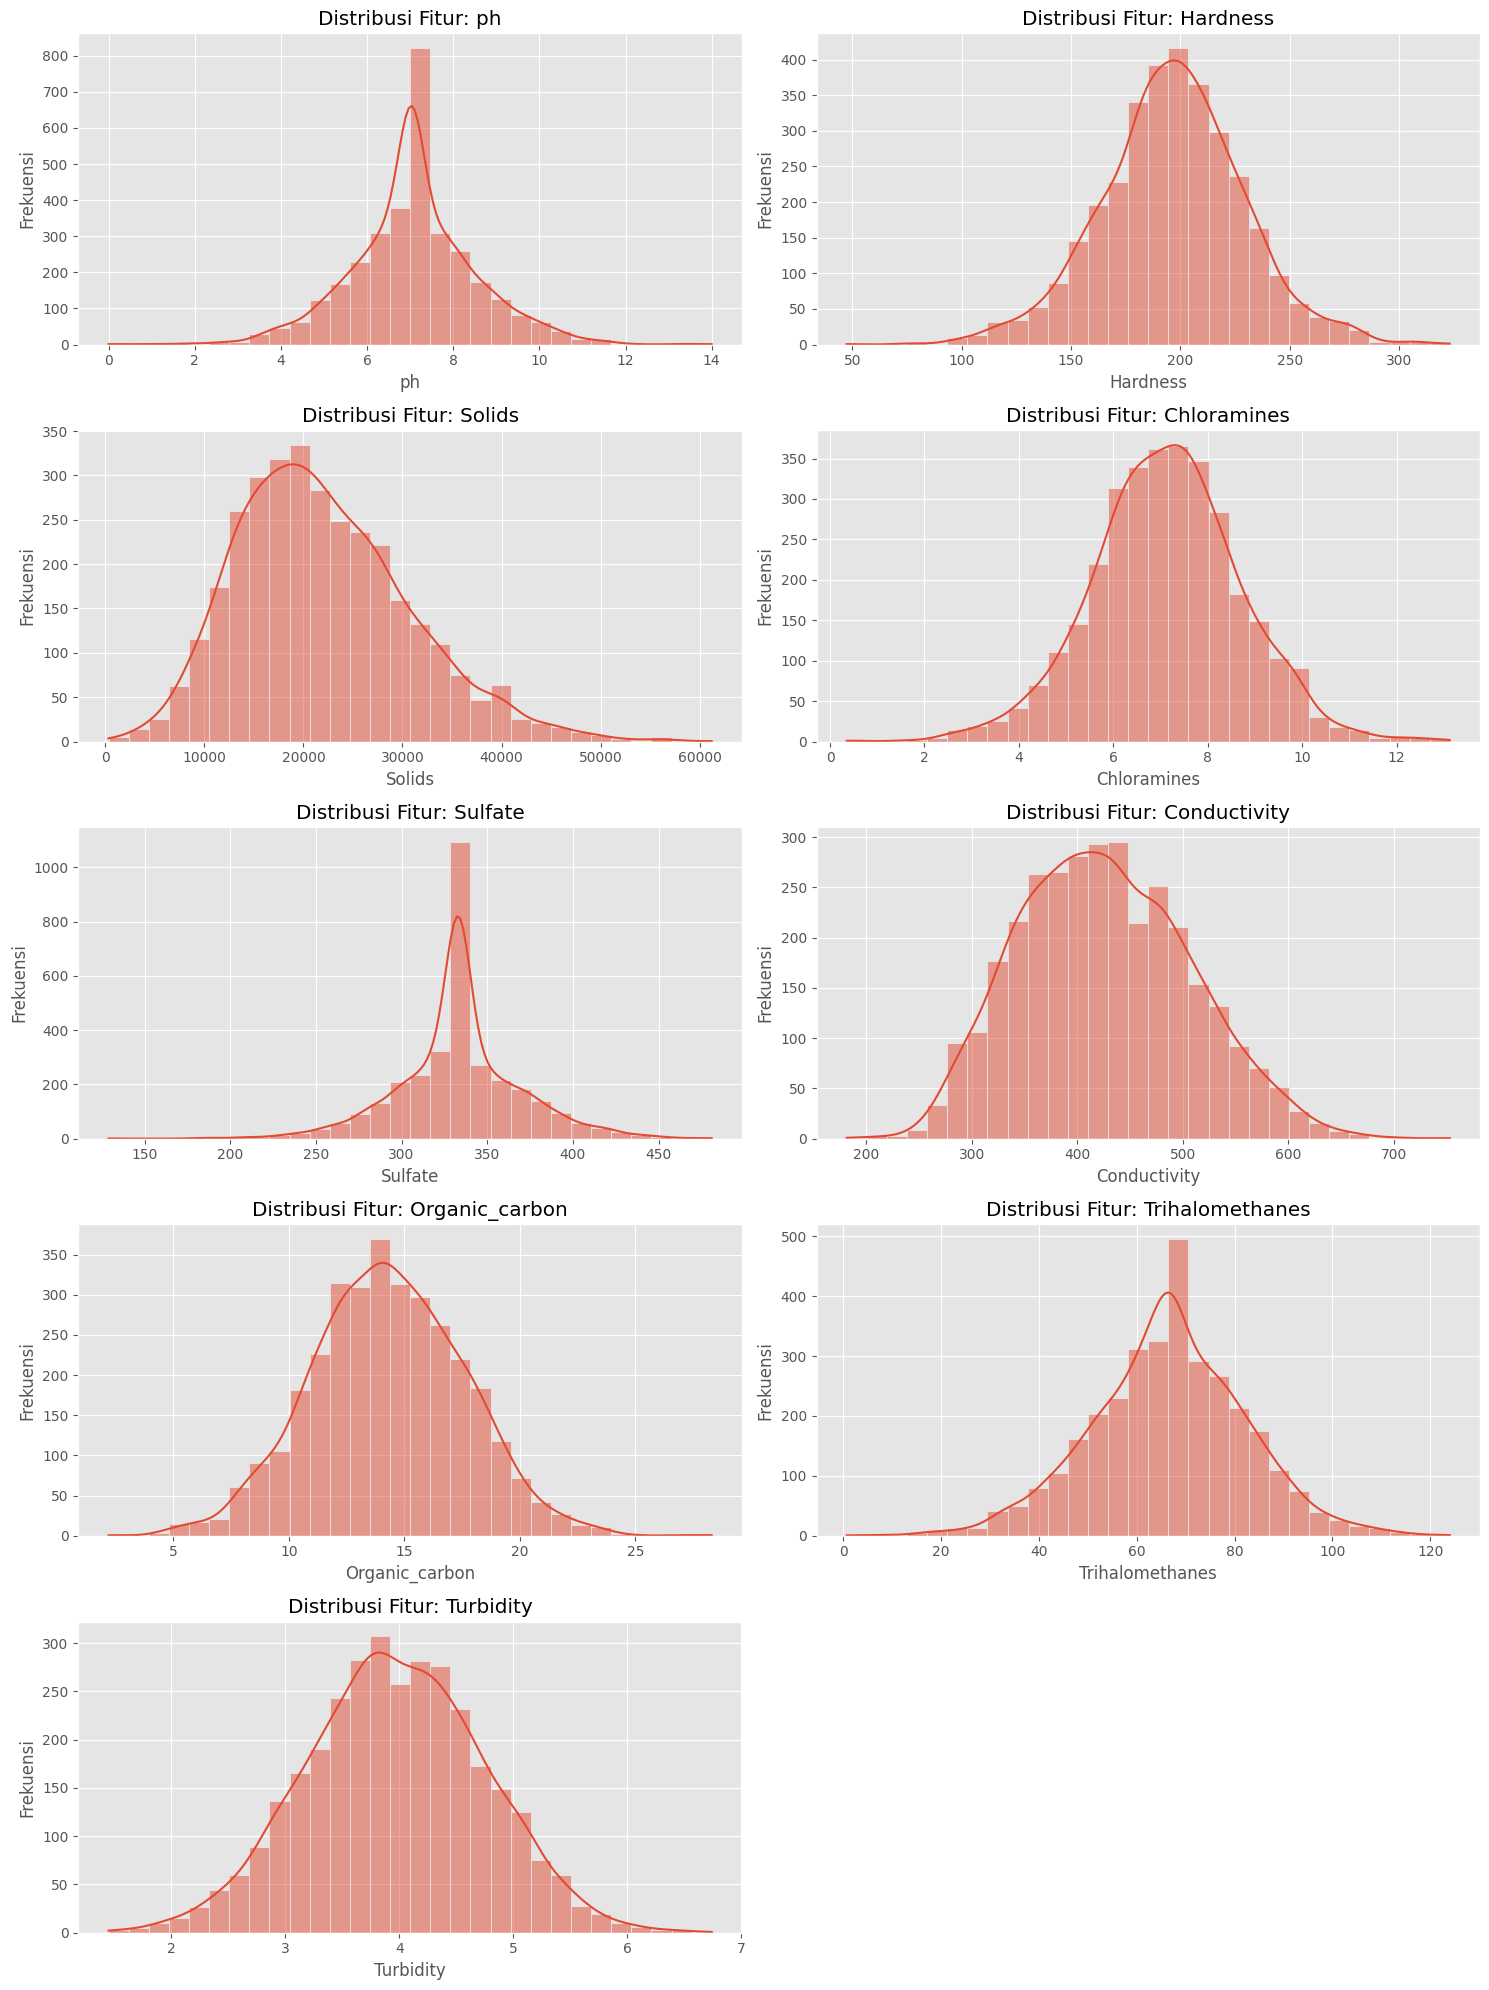

In [10]:
features = df.columns[:-1]
plt.figure(figsize=(15, 20))

for i, col in enumerate(features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi Fitur: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

## Handling Outlier

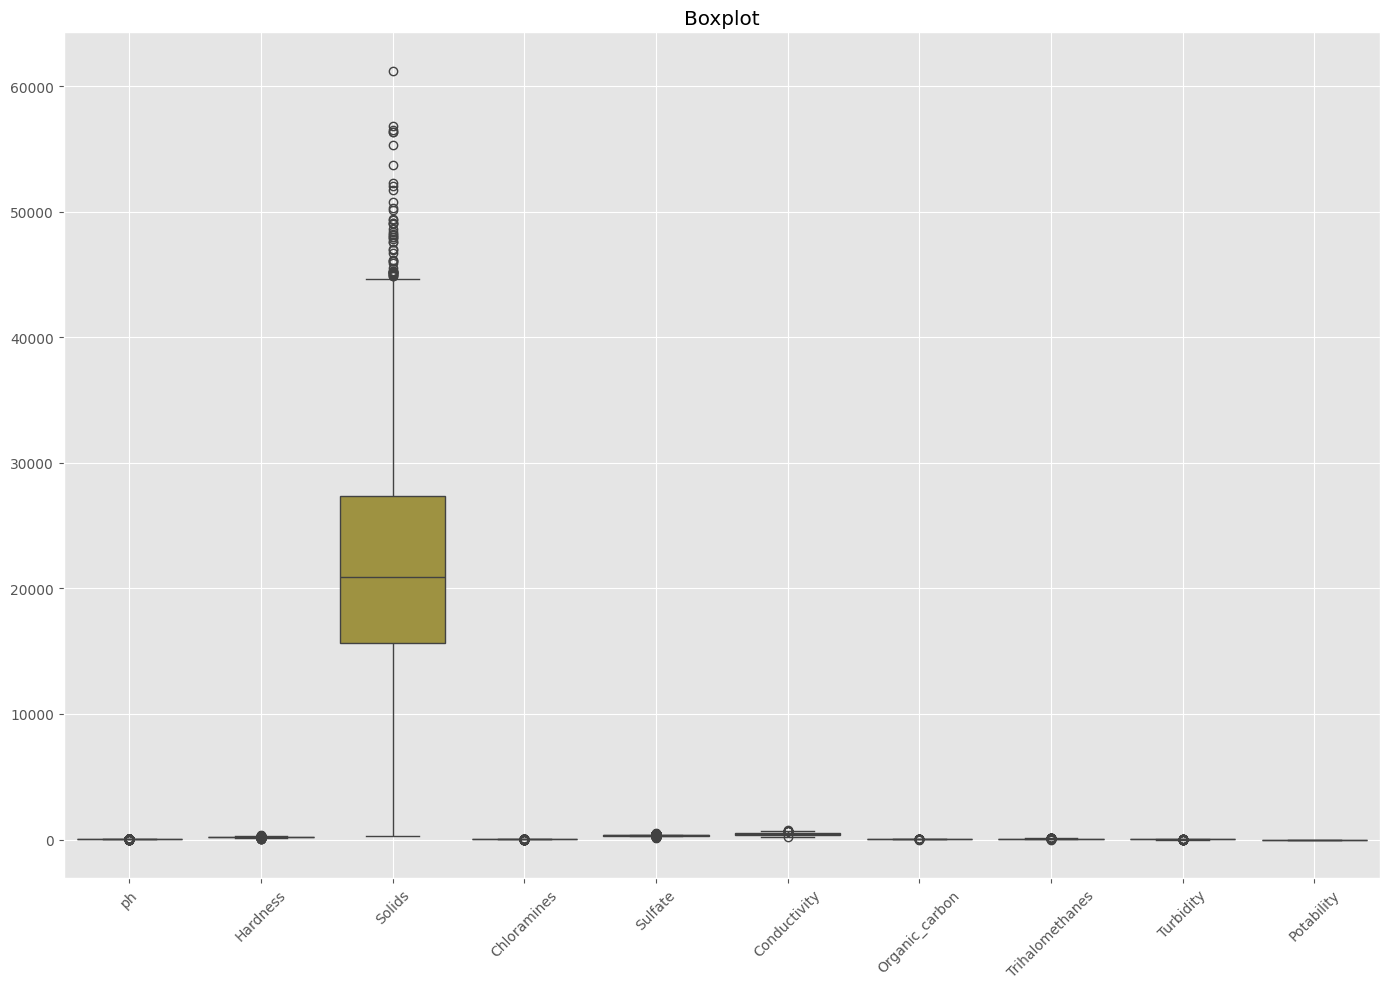

In [12]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=df)
plt.title("Boxplot")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
df_winsorized = df.copy()

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_winsorized[col] = df[col].clip(lower, upper)

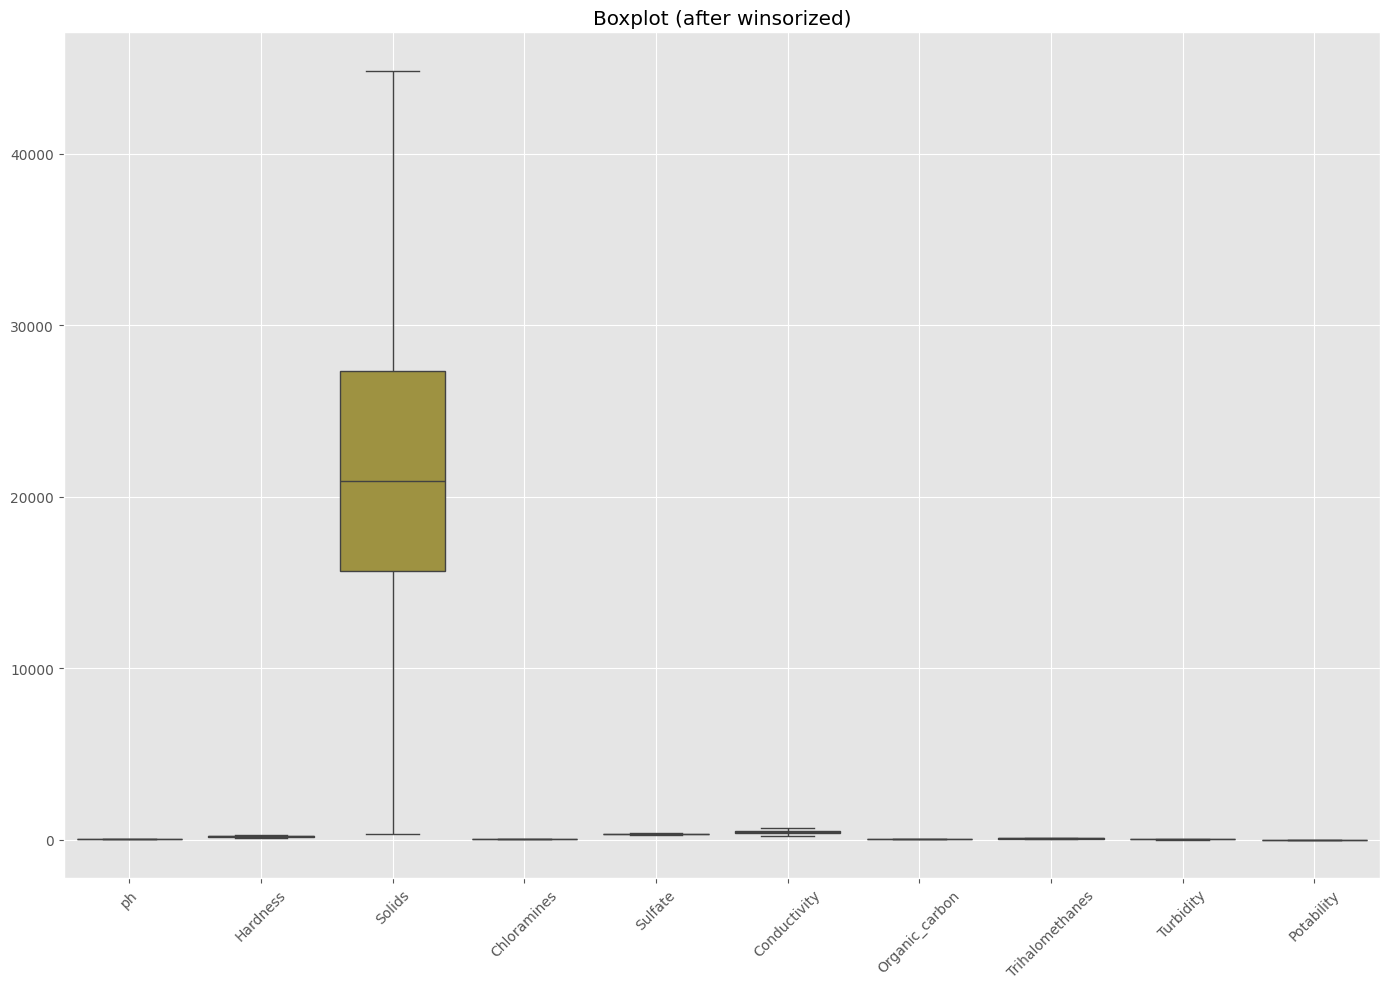

In [14]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=df_winsorized)
plt.title("Boxplot (after winsorized)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

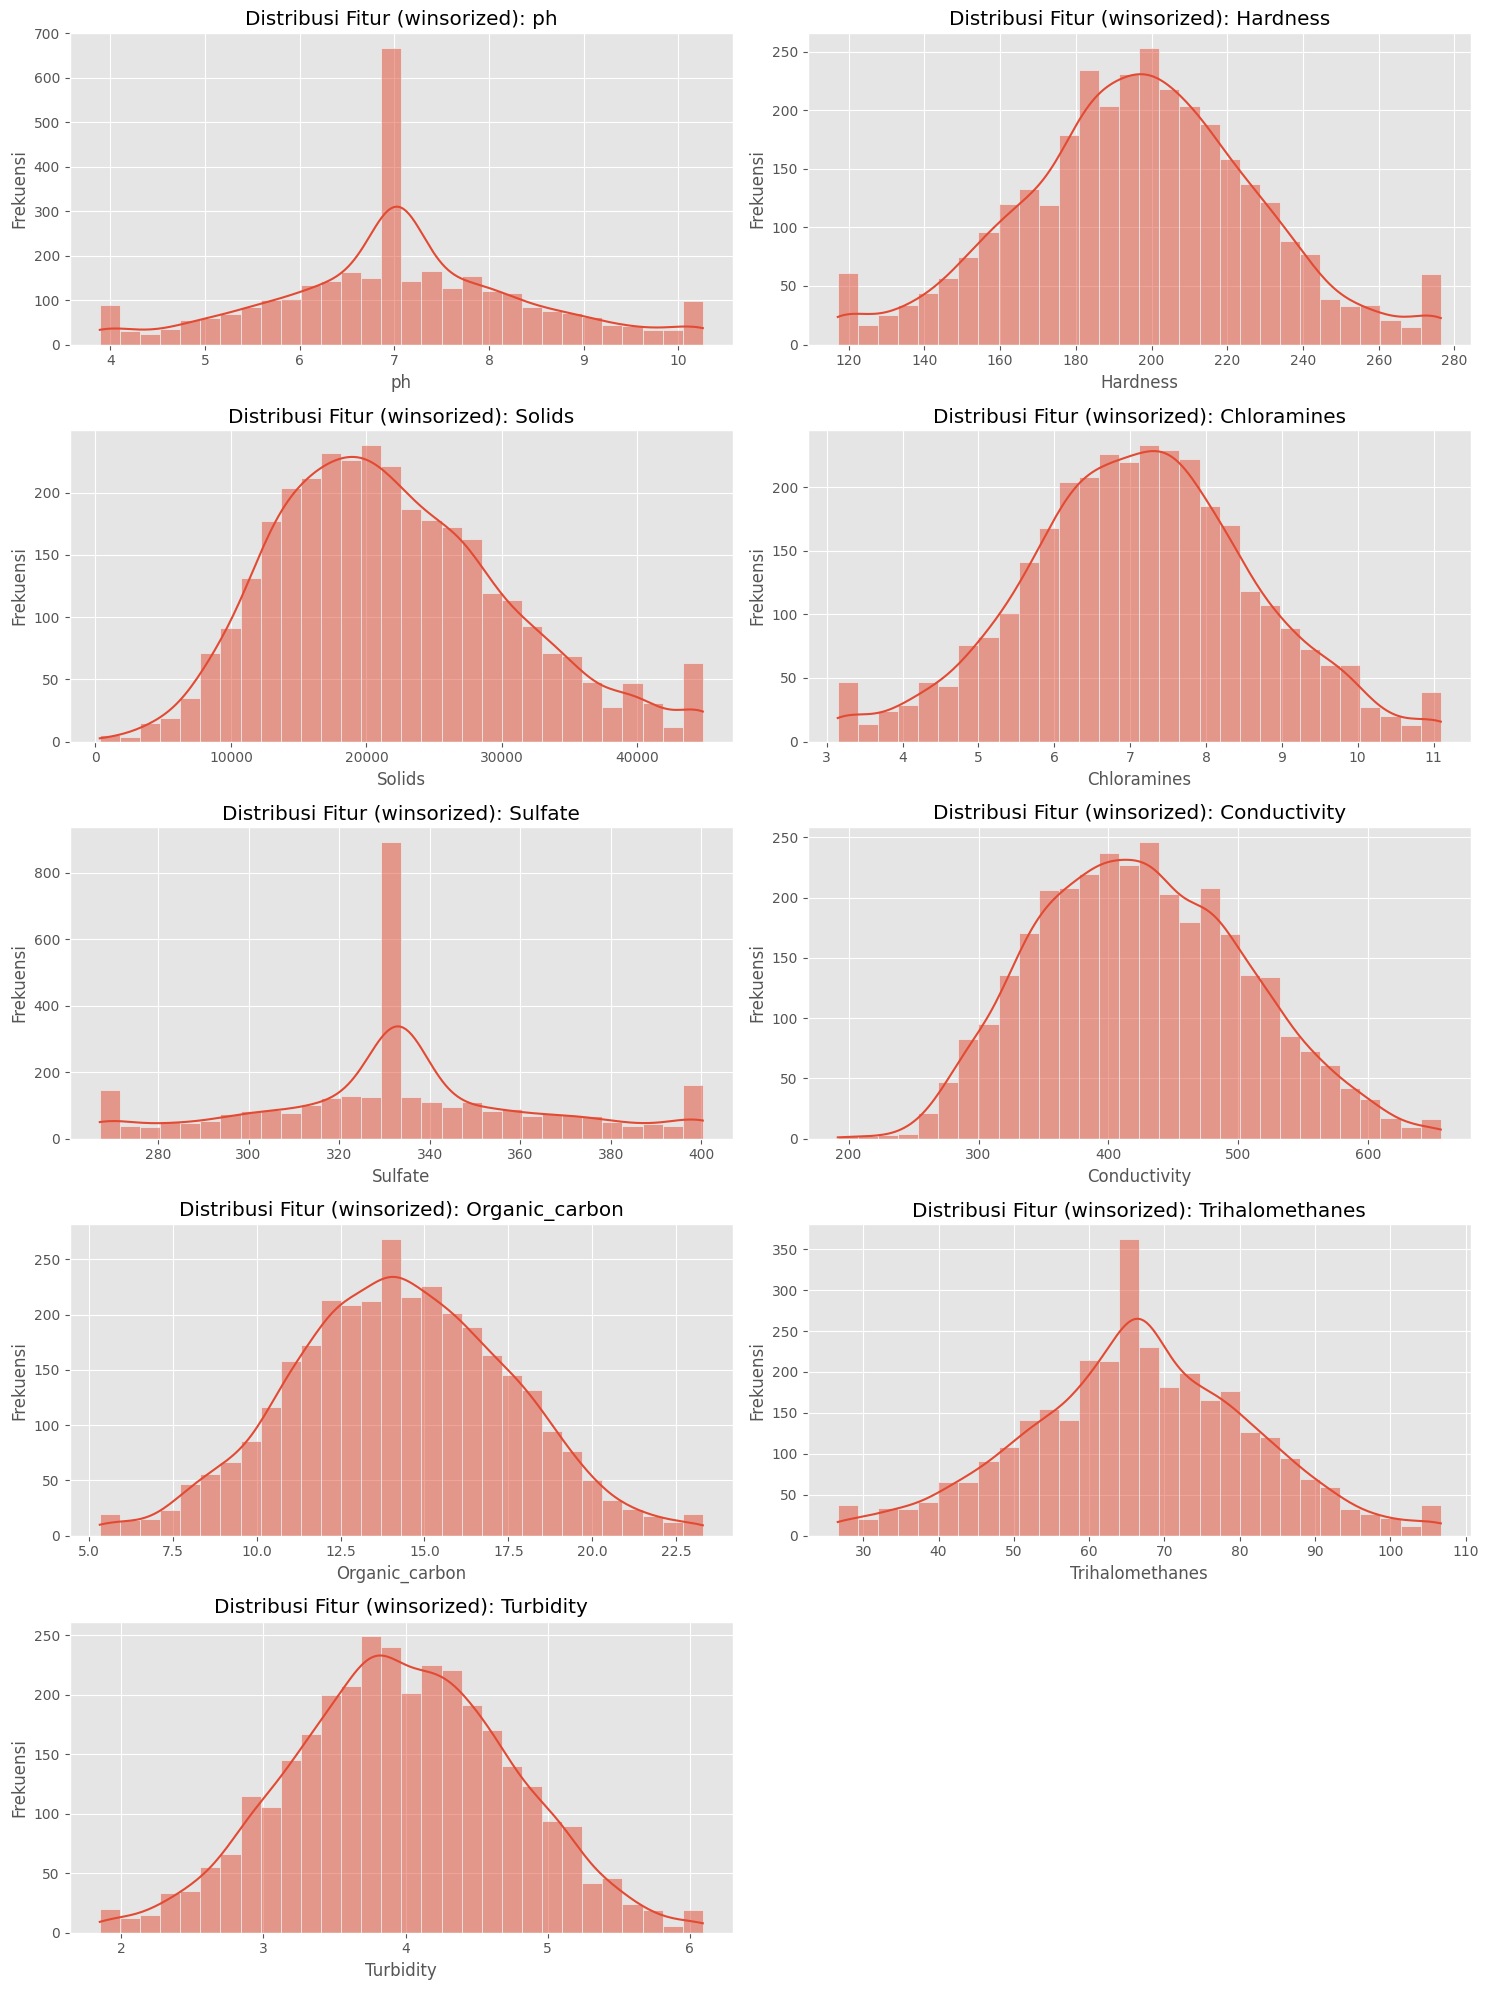

In [15]:
features = df.columns[:-1]
plt.figure(figsize=(15, 20))

for i, col in enumerate(features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df_winsorized[col], kde=True, bins=30)
    plt.title(f'Distribusi Fitur (winsorized): {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

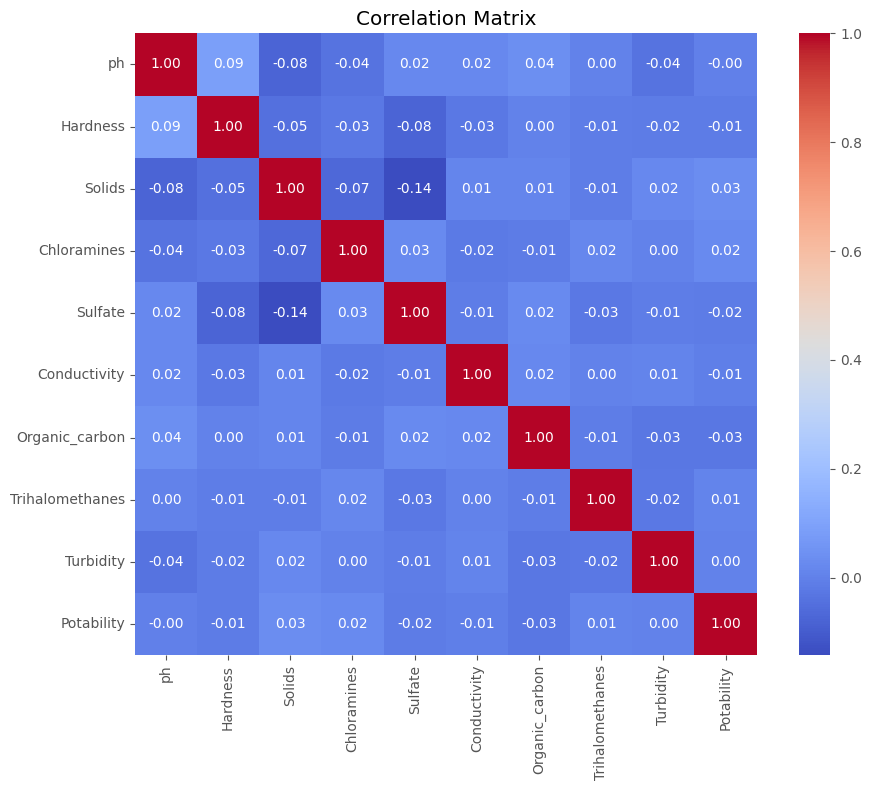

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_winsorized.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()
plt.show()

In [17]:
df_winsorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Modeling

In [18]:
X = df_winsorized.drop(columns='Potability')
y = df_winsorized['Potability']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
y.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [22]:
y.value_counts(normalize=True)

Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [24]:
pd.Series(y_train_smote).value_counts()

Potability
0    1598
1    1598
Name: count, dtype: int64

In [25]:
pd.Series(y_train_smote).value_counts(normalize=True)

Potability
0    0.5
1    0.5
Name: proportion, dtype: float64

# Modeling (Logistic Regression)

In [26]:
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42)

In [27]:
y_pred = model_lr.predict(X_test_scaled)
y_prob = model_lr.predict_proba(X_test_scaled)[:, 1]

In [28]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Tidak Layak", "Layak"]))

=== Classification Report ===
              precision    recall  f1-score   support

 Tidak Layak       0.63      0.51      0.57       400
       Layak       0.41      0.54      0.47       256

    accuracy                           0.52       656
   macro avg       0.52      0.52      0.52       656
weighted avg       0.55      0.52      0.53       656



In [29]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

=== Confusion Matrix ===
[[204 196]
 [118 138]]


In [30]:
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

ROC AUC Score: 0.543203125


# Modeling (Random Forest)

In [31]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [32]:
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

In [33]:
print("=== Classification Report (Random Forest) ===")
print(classification_report(y_test, y_pred_rf, target_names=["Tidak Layak", "Layak"]))

=== Classification Report (Random Forest) ===
              precision    recall  f1-score   support

 Tidak Layak       0.70      0.78      0.74       400
       Layak       0.58      0.47      0.52       256

    accuracy                           0.66       656
   macro avg       0.64      0.63      0.63       656
weighted avg       0.65      0.66      0.65       656



In [34]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_rf))

=== Confusion Matrix ===
[[311  89]
 [135 121]]


In [35]:
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

ROC AUC Score: 0.671484375


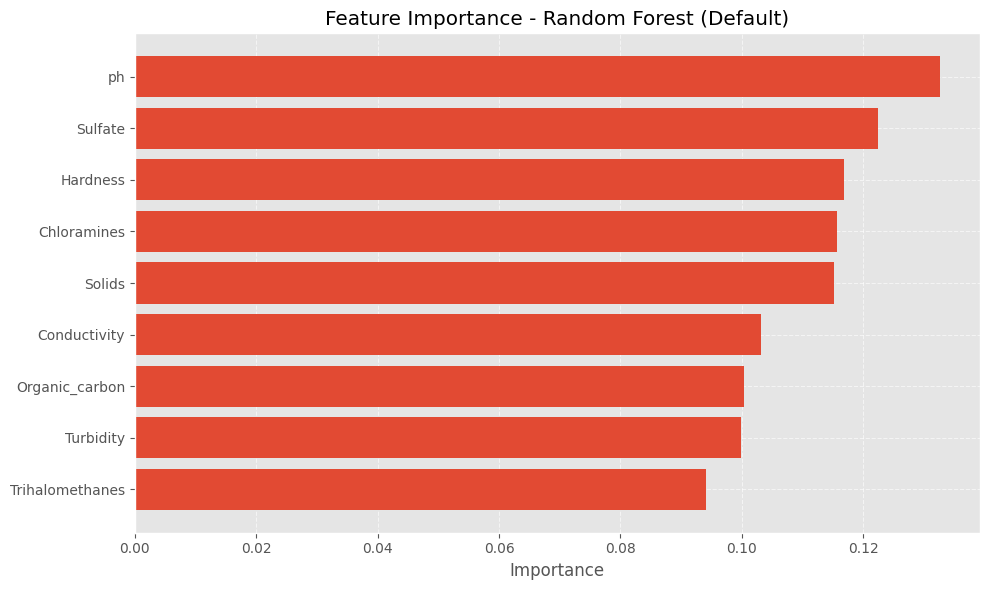

           Feature  Importance
0               ph    0.132600
4          Sulfate    0.122367
1         Hardness    0.116753
3      Chloramines    0.115637
2           Solids    0.115098
5     Conductivity    0.103229
6   Organic_carbon    0.100391
8        Turbidity    0.099791
7  Trihalomethanes    0.094135


In [36]:
importances = rf_model.feature_importances_
feature_names = X.columns

# Buat DataFrame importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest (Default)")
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Tampilkan tabel
print(feature_importance_df)

# Modeling (XBoost)

In [37]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [38]:
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

In [39]:
print("=== Classification Report (XGBoost) ===")
print(classification_report(y_test, y_pred_xgb, target_names=["Tidak Layak", "Layak"]))

=== Classification Report (XGBoost) ===
              precision    recall  f1-score   support

 Tidak Layak       0.70      0.74      0.72       400
       Layak       0.55      0.50      0.52       256

    accuracy                           0.64       656
   macro avg       0.62      0.62      0.62       656
weighted avg       0.64      0.64      0.64       656



In [40]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_xgb))

=== Confusion Matrix ===
[[295 105]
 [128 128]]


In [41]:
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_xgb))

ROC AUC Score: 0.6527148437500001


# CLustering

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_smote)

In [43]:
print("Explained Variance Ratio (PCA):", pca.explained_variance_ratio_)
print("Total Variance (2 Components):", sum(pca.explained_variance_ratio_))

Explained Variance Ratio (PCA): [0.14301124 0.12290358]
Total Variance (2 Components): 0.265914825321611


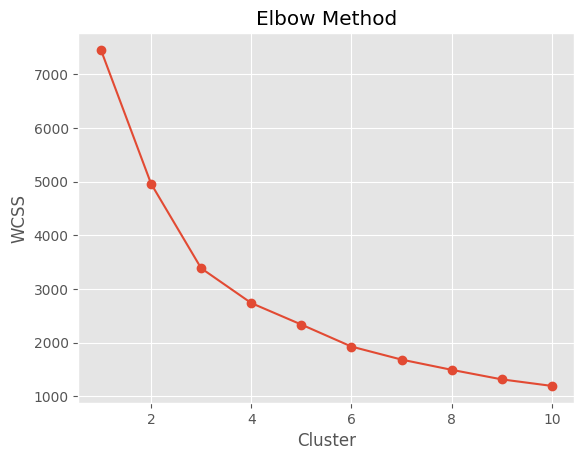

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [45]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

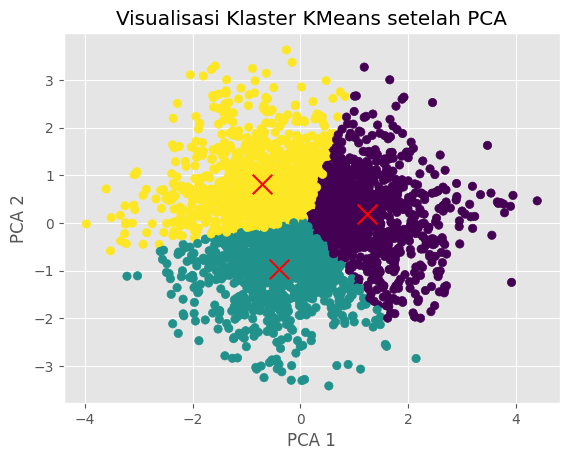

In [46]:
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
labels = kmeans.labels_
pca_df['Cluster'] = labels

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pca_df['Cluster'], cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisasi Klaster KMeans setelah PCA")
plt.show()

In [47]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
print("Silhouette score untuk", optimal_k, "Cluster:", silhouette_avg)

Silhouette score untuk 3 Cluster: 0.3374601493101285


In [48]:
clustered_df = pd.DataFrame(X_train_smote, columns=X.columns)
clustered_df['Cluster'] = labels

cluster_summary = clustered_df.groupby('Cluster').mean()

In [49]:
cluster_summary

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Cluster,,,,,,,,,
0,-0.210311,-0.175941,0.898665,-0.408413,-0.699913,0.055671,-0.020834,-0.022665,0.143253
1,0.534263,0.627899,-0.422917,-0.059100,0.061112,0.101305,0.296225,0.099535,-0.343629
2,-0.370074,-0.482680,-0.371192,0.427495,0.590814,-0.142759,-0.303362,-0.069139,0.229164


## Deployment

### Save model

In [54]:
#Import dulu semua yang dibutuhin
import joblib

#Save Random Forest
joblib.dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']

**App.py**

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load model
model = joblib.load("rf_model.joblib")

# Judul
st.title("💧 Deteksi Kelayakan Air Minum")
st.write("Prediksi apakah air layak dikonsumsi berdasarkan parameter kimia")

# Nama fitur
features = [
    "ph", "Hardness", "Solids", "Chloramines", "Sulfate",
    "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"
]

# Tabs: Upload CSV / Manual Input
tab1, tab2 = st.tabs(["📄 Upload CSV", "✍️ Input Manual"])

# TAB 1: UPLOAD CSV

with tab1:
    uploaded_file = st.file_uploader("Upload file CSV dengan kolom fitur lengkap:", type=["csv"])
    
    if uploaded_file is not None:
        data = pd.read_csv(uploaded_file)
        
        if set(features).issubset(data.columns):
            st.success("✅ Fitur sesuai, memproses prediksi...")
            pred = model.predict(data[features])
            data["Potability_Prediction"] = pred
            data["Kelayakan"] = data["Potability_Prediction"].map({1: "Layak Minum", 0: "Tidak Layak"})
            st.write(data)
        else:
            st.error("❌ CSV tidak mengandung semua fitur yang dibutuhkan.")

# TAB 2: INPUT MANUAL

with tab2:
    st.subheader("Masukkan Nilai Fitur Air")

    inputs = []
    for feature in features:
        value = st.number_input(f"{feature}", min_value=0.0, step=0.1)
        inputs.append(value)

    if st.button("Prediksi"):
        input_df = pd.DataFrame([inputs], columns=features)
        pred = model.predict(input_df)[0]
        result = "✅ Layak Minum" if pred == 1 else "❌ Tidak Layak Minum"
        st.success(f"Hasil Prediksi: **{result}**")

Overwriting app.py


**Import Library Ngrok**

In [51]:
from pyngrok import ngrok
import threading
import time
import os

In [52]:
!ngrok config add-authtoken 2wr5dMhVazpjt6N7xZppEig8BH6_2FhLruszN1faTeRxzD1EX

Authtoken saved to configuration file: C:\Users\Yazid\AppData\Local/ngrok/ngrok.yml


**Run**

In [56]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")

Streamlit app is live at: NgrokTunnel: "https://05e3-2001-448a-3050-e283-c56c-4328-85e7-8fed.ngrok-free.app" -> "http://localhost:8501"
